In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("laptop_data.csv")

In [3]:
df.drop(columns= ["Unnamed: 0"], inplace = True)

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.shape

(1303, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [6]:
df.duplicated().sum()

29

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(1274, 11)

In [10]:
df.describe()

,Inches,Price
count,1274.000000,1274.000000
mean,15.022449,60503.185074
std,1.429940,37333.222977
min,10.100000,9270.720000
25%,14.000000,32495.605200
50%,15.600000,52693.920000
75%,15.600000,79773.480000
max,18.400000,324954.720000


## Pre-Processing

In [11]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


### Ram

<Axes: xlabel='Ram'>

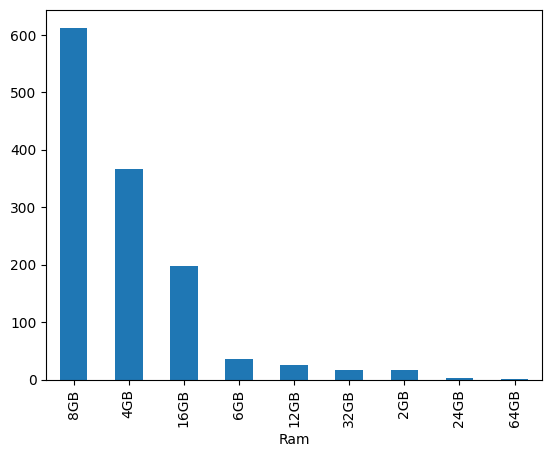

In [12]:
df["Ram"].value_counts().plot(kind = "bar")

In [13]:
## Removing GB from Ram column and converting it to and integer.

df["Ram"] = df["Ram"].apply(lambda x: x.replace("GB", "")).astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   object 
 10  Price             1274 non-null   float64
dtypes: float64(2), int32(1), object(8)
memory usage: 114.5+ KB


In [15]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


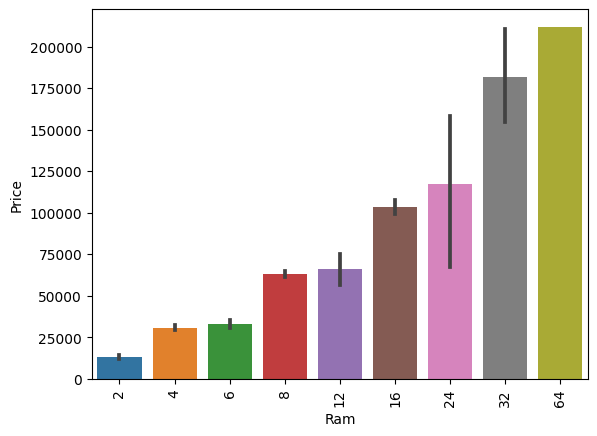

In [16]:
sns.barplot(x = df["Ram"], y = df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

### Weight

In [17]:
## Removing kg from Weight column and converting it to and integer.

df["Weight"] = df["Weight"].apply(lambda x: x.replace("kg", "")).astype("float32")

In [18]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 109.5+ KB


C:\Users\DIWAKAR SINGH\AppData\Local\Temp\ipykernel_11392\73369474.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Weight"])
D:\Python\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


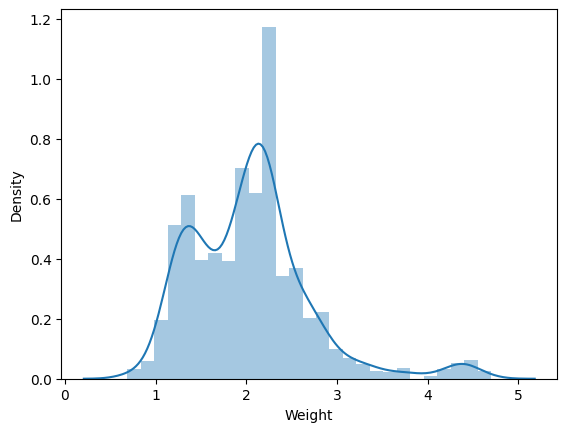

In [20]:
sns.distplot(df["Weight"])
plt.show()

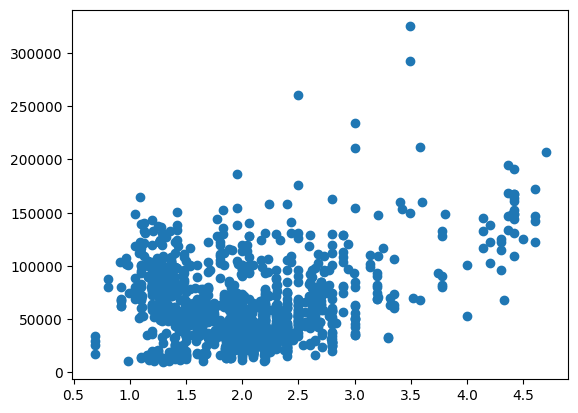

In [21]:
plt.scatter(x = df["Weight"], y = df["Price"])

### Screen Resolution

In [22]:
df["ScreenResolution"].sample(20)

98                              Full HD 1920x1080
792     IPS Panel Full HD / Touchscreen 1920x1080
275                                      1366x768
357                             Full HD 1920x1080
809                             Full HD 1920x1080
44                Full HD / Touchscreen 1920x1080
20                                       1366x768
239                   IPS Panel Full HD 1920x1080
284                   IPS Panel Full HD 1920x1080
188                   IPS Panel Full HD 1920x1080
225                             Full HD 1920x1080
731                                      1366x768
1108                            Full HD 1920x1080
620                                      1366x768
376                            IPS Panel 1366x768
581                                      1366x768
10                                       1366x768
5                                        1366x768
749                   IPS Panel Full HD 1920x1080
1169                  IPS Panel Full HD 1920x1080


In [23]:
## Removing the XY Resolution Part from ScreenResolution

df["XY_Res"] = df["ScreenResolution"].apply(lambda x: x.split(" ")[-1])

In [24]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,XY_Res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080


In [25]:
# Seperating X_Res and Y_Res and converting then to astype int

df['X_Res'] = df["XY_Res"].apply(lambda x: x.split("x")[0]).astype(int)
df['Y_Res'] = df["XY_Res"].apply(lambda x: x.split("x")[-1]).astype(int)

In [26]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,XY_Res,X_Res,Y_Res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600,2560,1600


In [27]:
# Creating a New Column of TouchScreen

df["TouchScreen"] = df["ScreenResolution"].apply(lambda x: x.split(" ")).apply(lambda x: [word.lower() for word in x]).apply(lambda x: 1 if "TouchScreen".lower() in x else 0)

In [28]:
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,XY_Res,X_Res,Y_Res,TouchScreen
255,Dell,Ultrabook,13.3,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.41,50562.7200,1920x1080,1920,1080,0
360,HP,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,1.86,23389.9200,1366x768,1366,768,0
859,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4,1TB HDD,Intel HD Graphics 520,No OS,2.20,24988.3200,1920x1080,1920,1080,0
516,HP,Notebook,15.6,Touchscreen 1366x768,Intel Core i5 8250U 1.6GHz,4,1TB HDD,Intel UHD Graphics 620,Windows 10,2.04,27783.9216,1366x768,1366,768,1
1186,Dell,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,2.09,62817.1200,1920x1080,1920,1080,1
1202,Dell,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,16,512GB SSD,Intel UHD Graphics 620,Windows 10,2.00,68464.8000,1920x1080,1920,1080,1
705,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.18,42357.6000,1920x1080,1920,1080,0
783,Lenovo,Notebook,15.6,1366x768,Intel Celeron Quad Core N3710 1.6GHz,8,1TB HDD,Intel HD Graphics 405,No OS,2.20,17529.1200,1366x768,1366,768,0
496,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,2.17,47893.3920,1920x1080,1920,1080,0
265,Dell,2 in 1 Convertible,15.6,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,2.67,42570.7200,1920x1080,1920,1080,1


<Axes: xlabel='TouchScreen'>

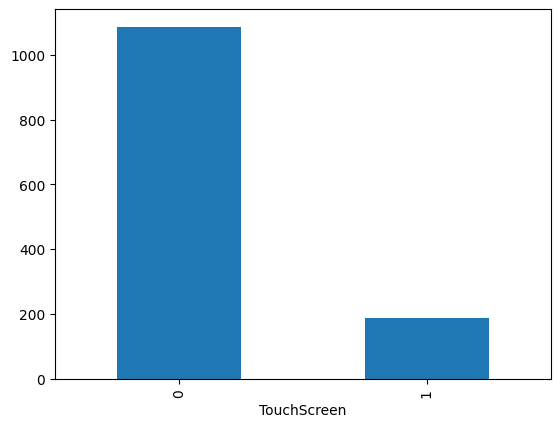

In [29]:
df["TouchScreen"].value_counts().plot(kind = "bar")

<Axes: xlabel='TouchScreen', ylabel='Price'>

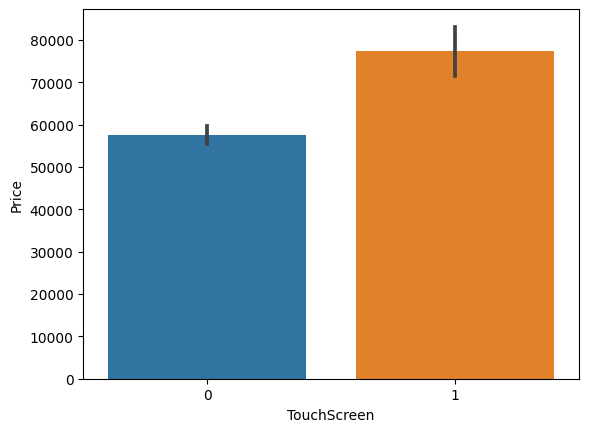

In [30]:
sns.barplot(x = df["TouchScreen"], y = df["Price"])

In [31]:
# Creating a New Column of IPS

df["IPS"] = df["ScreenResolution"].apply(lambda x: x.split(" ")).apply(lambda x: [word.lower() for word in x]).apply(lambda x: 1 if "IPS".lower() in x else 0)

<Axes: xlabel='IPS'>

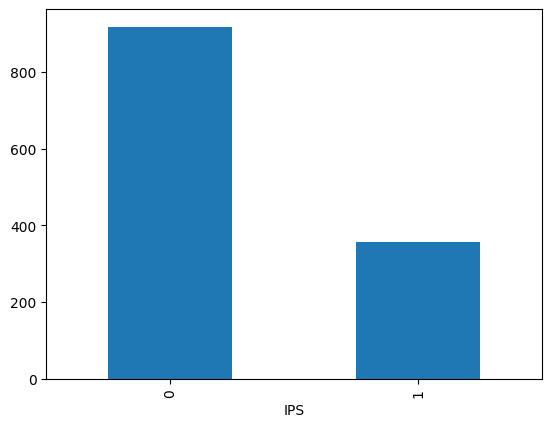

In [32]:
df["IPS"].value_counts().plot(kind = "bar")

<Axes: xlabel='IPS', ylabel='Price'>

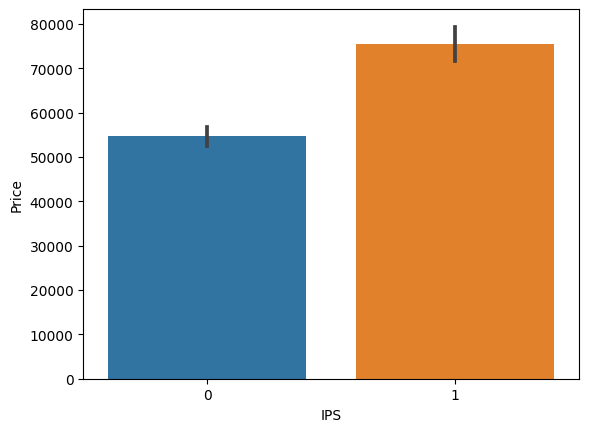

In [33]:
sns.barplot(x = df["IPS"], y = df["Price"])

In [34]:
df[["Price", "Inches", "Ram", "Weight", "X_Res", "Y_Res", "TouchScreen", "IPS"]].corr()["Price"]

Price          1.000000
Inches         0.066990
Ram            0.740106
Weight         0.212192
X_Res          0.552074
Y_Res          0.548111
TouchScreen    0.188631
IPS            0.250358
Name: Price, dtype: float64

In [35]:
# Creating a new column PPI

df["PPI"] = ((df["X_Res"]**2) + (df["Y_Res"]**2))**0.5/ df["Inches"]

In [36]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,XY_Res,X_Res,Y_Res,TouchScreen,IPS,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,2560,1600,0,1,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,1440,900,0,0,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080,1920,1080,0,0,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800,2880,1800,0,1,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600,2560,1600,0,1,226.983005


In [37]:
# df[["Price", "Inches", "Ram", "Weight", "X_Res", "Y_Res", "TouchScreen", "IPS", "PPI"]].corr()["Price"]

In [38]:
# Drop unncessry columns

df.drop(columns = ["ScreenResolution", "Inches", "X_Res", "Y_Res", "XY_Res"], inplace = True)

In [39]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


### CPU

In [40]:
df["Cpu_Name"] = df["Cpu"].apply(lambda x: " ".join(x.split(" ")[: 3]))

In [41]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_Name
629,Dell,Notebook,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.00,96969.60,0,0,141.211998,Intel Core i7
970,Dell,2 in 1 Convertible,Intel Core i7 7Y75 1.3GHz,16,512GB SSD,Intel HD Graphics 615,Windows 10,1.22,101178.72,1,0,276.053530,Intel Core i7
1263,Acer,Notebook,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics 400,Linux,2.40,15397.92,0,0,100.454670,Intel Celeron Dual
85,Dell,Gaming,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.65,71874.72,0,1,141.211998,Intel Core i7
1058,Dell,2 in 1 Convertible,Intel Core i7 7500U 2.7GHz,12,256GB SSD,Intel HD Graphics 620,Windows 10,1.60,69210.72,1,1,165.632118,Intel Core i7


In [42]:
def fetch_processor(processor):
    if processor == "Intel Core i3" or processor == "Intel Core i5" or processor == "Intel Core i7":
        return processor
    else:
        if processor.split(" ")[0] == "Intel":
            return "Other Intel Processors"
        else:
            return "AMD Processors"

In [43]:
df["Cpu_Brand"] = df["Cpu_Name"].apply(fetch_processor)

In [44]:
df.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_Name,Cpu_Brand
882,Asus,Notebook,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.65,18541.4400,0,0,111.141337,Intel Celeron Dual,Other Intel Processors
683,HP,Notebook,Intel Core i3 6006U 2GHz,4,256GB SSD,AMD Radeon R5 520,Windows 10,2.50,37242.7200,0,1,127.335675,Intel Core i3,Intel Core i3
1195,HP,Notebook,Intel Core i7 7700HQ 2.8GHz,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.21,70702.5600,0,1,141.211998,Intel Core i7,Intel Core i7
105,HP,Notebook,Intel Core i5 7200U 2.5GHz,6,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.58,35111.5200,0,1,157.350512,Intel Core i5,Intel Core i5
460,Acer,Notebook,Intel Core i3 6006U 2GHz,4,1TB HDD,Nvidia GeForce 940MX,Windows 10,2.23,28984.3200,0,0,141.211998,Intel Core i3,Intel Core i3
1052,Dell,2 in 1 Convertible,Intel Core i5 7200U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.30,58288.3200,1,1,141.211998,Intel Core i5,Intel Core i5
1028,Dell,Ultrabook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.29,86526.7200,1,0,276.053530,Intel Core i5,Intel Core i5
25,Dell,Notebook,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,Windows 10,2.30,22305.1392,0,0,100.454670,Intel Core i3,Intel Core i3
1119,Asus,Gaming,Intel Core i7 6700HQ 2.6GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,3.52,69929.4672,0,0,127.335675,Intel Core i7,Intel Core i7
665,Toshiba,Notebook,Intel Core i3 6100U 2.1GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,2.10,26533.4400,0,0,100.454670,Intel Core i3,Intel Core i3


<Axes: xlabel='Cpu_Brand'>

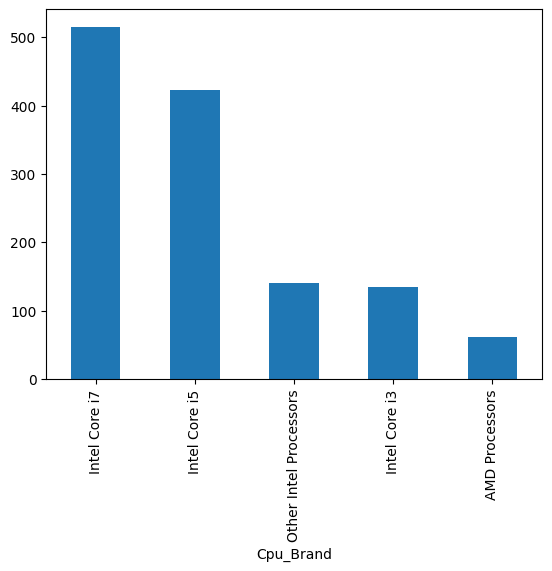

In [45]:
df["Cpu_Brand"].value_counts().plot(kind = "bar")

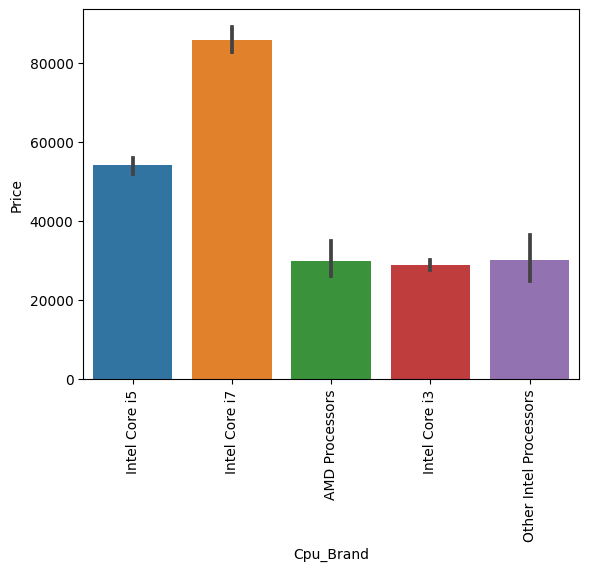

In [46]:
sns.barplot(x = df["Cpu_Brand"], y = df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

In [47]:
df.drop(columns = ["Cpu", "Cpu_Name"], inplace = True)

### Memory

In [48]:
df.head(3)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5


In [49]:
df["Memory"].head(10)

0              128GB SSD
1    128GB Flash Storage
2              256GB SSD
3              512GB SSD
4              256GB SSD
5              500GB HDD
6    256GB Flash Storage
7    256GB Flash Storage
8              512GB SSD
9              256GB SSD
Name: Memory, dtype: object

In [50]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace("GB", "")
df["Memory"] = df["Memory"].str.replace("TB", "000")
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '', regex =True)

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '', regex =True)

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage', "Memory"],inplace=True)

In [51]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_Brand,HDD,SSD,Hybrid,Flash_Storage
136,Lenovo,Notebook,4,Intel HD Graphics 500,No OS,1.90,13445.7408,0,0,100.454670,Other Intel Processors,1000,0,0,0
481,Dell,Notebook,4,Intel HD Graphics 620,Windows 10,2.18,31254.0480,0,0,100.454670,Intel Core i3,1000,0,0,0
1134,Acer,Notebook,4,Nvidia GeForce 940MX,Windows 10,2.23,32820.4800,0,0,141.211998,Intel Core i5,1000,0,0,0
477,Lenovo,Notebook,8,Intel HD Graphics 620,Windows 10,1.70,72673.9200,0,0,157.350512,Intel Core i5,0,180,0,0
758,Dell,Gaming,16,Nvidia GeForce GTX 1070,Windows 10,4.42,152859.7872,0,1,282.423996,Intel Core i7,1000,256,0,0


In [52]:
df[["Price", "Ram", "Weight", "TouchScreen", "IPS", "HDD", "SSD", "Hybrid", "Flash_Storage"]].corr()["Price"]

Price            1.000000
Ram              0.740106
Weight           0.212192
TouchScreen      0.188631
IPS              0.250358
HDD             -0.098011
SSD              0.669957
Hybrid           0.022533
Flash_Storage   -0.037176
Name: Price, dtype: float64

In [53]:
df.drop(columns = ["Hybrid", "Flash_Storage"], inplace = True)

In [54]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


### GPU

In [55]:
df["Gpu_Brand"] = df["Gpu"].apply(lambda x: x.split(" ")[0])

In [56]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_Brand,HDD,SSD,Gpu_Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [57]:
df["Gpu_Brand"].value_counts()

Gpu_Brand
Intel     703
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

In [58]:
df = df[df["Gpu_Brand"] != "ARM"]

In [59]:
df["Gpu_Brand"].value_counts()

Gpu_Brand
Intel     703
Nvidia    396
AMD       174
Name: count, dtype: int64

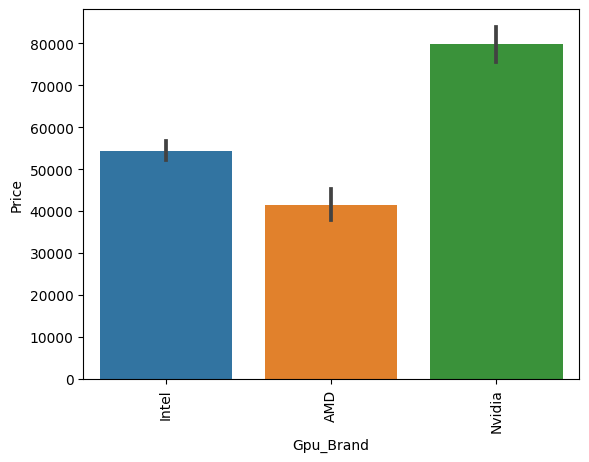

In [60]:
sns.barplot(x = df["Gpu_Brand"], y = df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

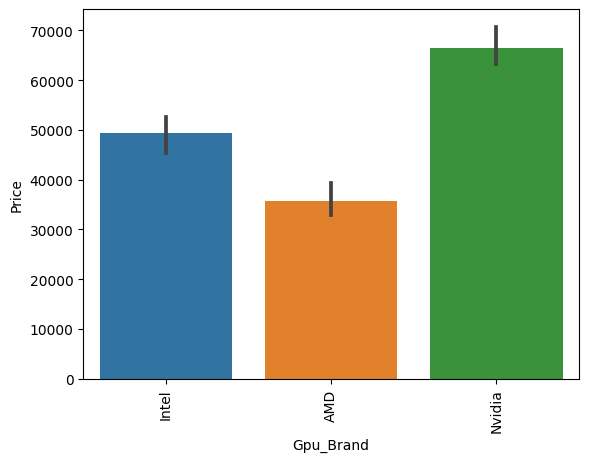

In [61]:
sns.barplot(x = df["Gpu_Brand"], y = df["Price"], estimator= "median")
plt.xticks(rotation = "vertical")
plt.show()

In [62]:
df.drop(columns= ["Gpu"], inplace= True)

In [63]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_Brand,HDD,SSD,Gpu_Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


### OpSys

<Axes: xlabel='OpSys'>

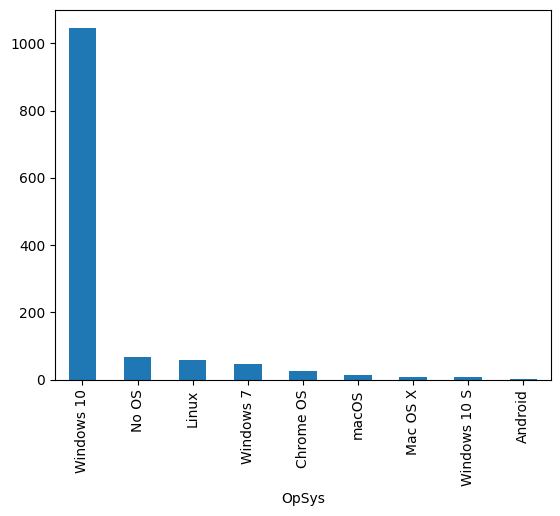

In [64]:
df["OpSys"].value_counts().plot(kind = "bar")

In [65]:
df["OpSys"].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [66]:
def filter_os(text):
    if text == "Windows 10" or text == "Windows 7" or text == "Windows 10 S":
        return "Windows"
    elif text == "macOS" or text == "Mac OS X":
        return "Mac"
    else:
        return "Others/ No OS/ Linux"

In [67]:
df["os"] = df["OpSys"].apply(filter_os)

In [68]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,Cpu_Brand,HDD,SSD,Gpu_Brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/ No OS/ Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [69]:
df["os"].value_counts()

os
Windows                 1100
Others/ No OS/ Linux     152
Mac                       21
Name: count, dtype: int64

<Axes: xlabel='os'>

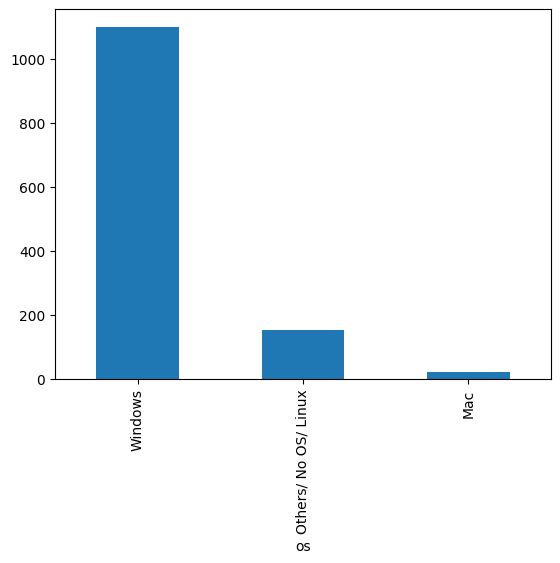

In [70]:
df["os"].value_counts().plot(kind = "bar")

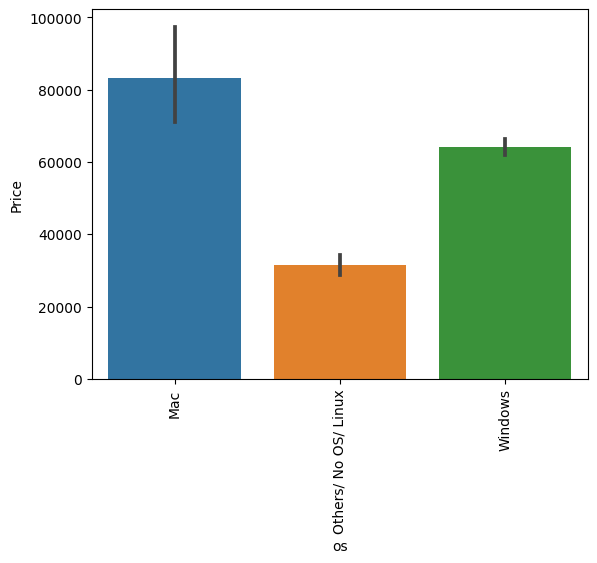

In [71]:
sns.barplot(x = df["os"], y = df["Price"])
plt.xticks(rotation = "vertical")
plt.show()

In [72]:
df.drop(columns= ["OpSys"], inplace = True)

In [73]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,PPI,Cpu_Brand,HDD,SSD,Gpu_Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/ No OS/ Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


<Axes: >

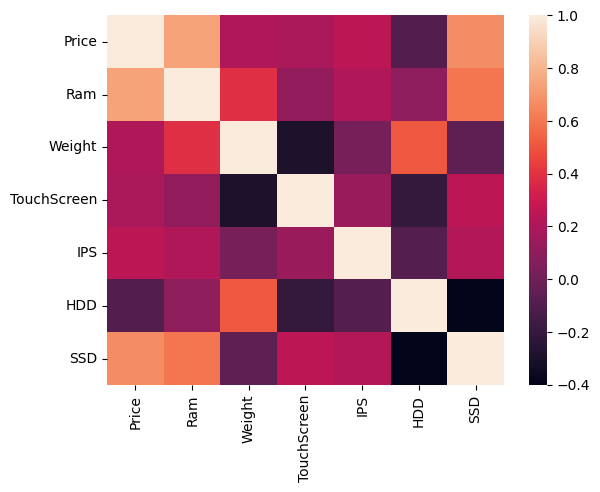

In [74]:
sns.heatmap(df[["Price", "Ram", "Weight", "TouchScreen", "IPS", "HDD", "SSD"]].corr())

## Train Test Split

In [75]:
x = df.drop(columns = ["Price"])
y = np.log(df["Price"])

In [76]:
x

,Company,TypeName,Ram,Weight,TouchScreen,IPS,PPI,Cpu_Brand,HDD,SSD,Gpu_Brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/ No OS/ Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,2.20,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1270,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1271,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1272,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processors,0,0,Intel,Windows


In [77]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1269    10.555257
1270    10.433899
1271    11.288115
1272     9.409283
1273    10.614129
Name: Price, Length: 1273, dtype: float64

In [78]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.15, random_state= 2)

In [79]:
x_train

,Company,TypeName,Ram,Weight,TouchScreen,IPS,PPI,Cpu_Brand,HDD,SSD,Gpu_Brand,os
716,Dell,Notebook,8,1.90,0,0,141.211998,Intel Core i5,0,256,Intel,Windows
21,Lenovo,Gaming,8,2.50,0,1,141.211998,Intel Core i5,1000,128,Nvidia,Windows
968,Dell,Gaming,32,4.42,0,1,127.335675,Intel Core i7,1000,256,Nvidia,Windows
273,Lenovo,2 in 1 Convertible,16,1.36,1,0,209.800683,Intel Core i7,0,512,Intel,Windows
1234,Apple,Ultrabook,4,1.08,0,0,135.094211,Intel Core i5,0,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processors,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/ No OS/ Linux


In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

## Linear Regression

In [81]:
step1 = ColumnTransformer(transformers= [
    ("ohe_trf", OneHotEncoder(sparse = False, drop = "first"), [0, 1, 7, 10, 11])
], remainder= "passthrough")

step2 = LinearRegression()

pipe = Pipeline([
    ("step1", step1),
    ("step2", step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print("R2_Score: - ", r2_score(y_test, y_pred))
print("MAE: - ", mean_absolute_error(y_test, y_pred))

R2_Score: -  0.7831567115449892
MAE: -  0.221676964910564


D:\Python\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Lasso

In [82]:
step1 = ColumnTransformer(transformers= [
    ("ohe_trf", OneHotEncoder(sparse = False, drop = "first"), [0, 1, 7, 10, 11])
], remainder= "passthrough")

step2 = Lasso(alpha = 0.001)

pipe = Pipeline([
    ("step1", step1),
    ("step2", step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print("R2_Score: - ", r2_score(y_test, y_pred))
print("MAE: - ", mean_absolute_error(y_test, y_pred))

R2_Score: -  0.7930860253542003
MAE: -  0.21874223266360715


D:\Python\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Ridge

In [83]:
step1 = ColumnTransformer(transformers= [
    ("ohe_trf", OneHotEncoder(sparse = False, drop = "first"), [0, 1, 7, 10, 11])
], remainder= "passthrough")

step2 = Ridge(alpha = 10)

pipe = Pipeline([
    ("step1", step1),
    ("step2", step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print("R2_Score: - ", r2_score(y_test, y_pred))
print("MAE: - ", mean_absolute_error(y_test, y_pred))

R2_Score: -  0.7954034359736731
MAE: -  0.21818884825637244


D:\Python\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## KNN

In [1]:
step1 = ColumnTransformer(transformers= [
    ("ohe_trf", OneHotEncoder(sparse = False, drop = "first"), [0, 1, 7, 10, 11])
], remainder= "passthrough")

step2 = KNeighborsRegressor(n_neighbors= 7)

pipe = Pipeline([
    ("step1", step1),
    ("step2", step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print("R2_Score: - ", r2_score(y_test, y_pred))
print("MAE: - ", mean_absolute_error(y_test, y_pred))

NameError: name 'ColumnTransformer' is not defined

## Decision Tree

In [85]:
step1 = ColumnTransformer(transformers= [
    ("ohe_trf", OneHotEncoder(sparse = False, drop = "first"), [0, 1, 7, 10, 11])
], remainder= "passthrough")

step2 = DecisionTreeRegressor(max_depth= 8)

pipe = Pipeline([
    ("step1", step1),
    ("step2", step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print("R2_Score: - ", r2_score(y_test, y_pred))
print("MAE: - ", mean_absolute_error(y_test, y_pred))

R2_Score: -  0.8107316836188702
MAE: -  0.20361794219161958


D:\Python\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## SVM

In [86]:
step1 = ColumnTransformer(transformers= [
    ("ohe_trf", OneHotEncoder(sparse = False, drop = "first"), [0, 1, 7, 10, 11])
], remainder= "passthrough")

step2 = SVR(kernel="rbf", C = 10000, epsilon= 0.1)

pipe = Pipeline([
    ("step1", step1),
    ("step2", step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print("R2_Score: - ", r2_score(y_test, y_pred))
print("MAE: - ", mean_absolute_error(y_test, y_pred))

D:\Python\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2_Score: -  0.8239727305718005
MAE: -  0.2019651466855443


## Extra Trees

In [89]:
step1 = ColumnTransformer(transformers= [
    ("ohe_trf", OneHotEncoder(sparse = False, drop = "first"), [0, 1, 7, 10, 11])
], remainder= "passthrough")

step2 = ExtraTreesRegressor(n_estimators = 100,
                             random_state = 3,
                             max_samples = 0.5,
                            bootstrap=True,
                             max_features =0.75,
                             max_depth = 15)

pipe = Pipeline([
    ("step1", step1),
    ("step2", step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print("R2_Score: - ", r2_score(y_test, y_pred))
print("MAE: - ", mean_absolute_error(y_test, y_pred))

R2_Score: -  0.8556644099374368
MAE: -  0.17894313934894918


D:\Python\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## AdaBoost

In [90]:
step1 = ColumnTransformer(transformers= [
    ("ohe_trf", OneHotEncoder(sparse = False, drop = "first"), [0, 1, 7, 10, 11])
], remainder= "passthrough")

step2 = AdaBoostRegressor(n_estimators = 15, learning_rate= 0.1)

pipe = Pipeline([
    ("step1", step1),
    ("step2", step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print("R2_Score: - ", r2_score(y_test, y_pred))
print("MAE: - ", mean_absolute_error(y_test, y_pred))

R2_Score: -  0.7304114318357745
MAE: -  0.2502391313637134


D:\Python\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Gradient Boost

In [91]:
step1 = ColumnTransformer(transformers= [
    ("ohe_trf", OneHotEncoder(sparse = False, drop = "first"), [0, 1, 7, 10, 11])
], remainder= "passthrough")

step2 = AdaBoostRegressor(n_estimators = 500)

pipe = Pipeline([
    ("step1", step1),
    ("step2", step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print("R2_Score: - ", r2_score(y_test, y_pred))
print("MAE: - ", mean_absolute_error(y_test, y_pred))

D:\Python\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2_Score: -  0.8074323272863427
MAE: -  0.21891404893861752


## XGBoost

In [92]:
step1 = ColumnTransformer(transformers= [
    ("ohe_trf", OneHotEncoder(sparse = False, drop = "first"), [0, 1, 7, 10, 11])
], remainder= "passthrough")

step2 = XGBRegressor(n_estimators = 45, max_depth = 5, learning_rate = 0.5)

pipe = Pipeline([
    ("step1", step1),
    ("step2", step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print("R2_Score: - ", r2_score(y_test, y_pred))
print("MAE: - ", mean_absolute_error(y_test, y_pred))

R2_Score: -  0.8577085252343362
MAE: -  0.17495873117196403


D:\Python\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Voting Regressor

In [95]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15, bootstrap=True)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10, bootstrap=True)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

D:\Python\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8576514131243462
MAE 0.17689682117423375


## Stacking

In [96]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

D:\Python\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8490467403463234
MAE 0.18371571709166012


## Random Forest 

In [97]:
step1 = ColumnTransformer(transformers= [
    ("ohe_trf", OneHotEncoder(sparse = False, drop = "first"), [0, 1, 7, 10, 11])
], remainder= "passthrough")

step2 = RandomForestRegressor(n_estimators = 100,
                             random_state = 3,
                             max_samples = 0.5,
                             max_features =0.75,
                             max_depth = 15)

pipe = Pipeline([
    ("step1", step1),
    ("step2", step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print("R2_Score: - ", r2_score(y_test, y_pred))
print("MAE: - ", mean_absolute_error(y_test, y_pred))

D:\Python\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2_Score: -  0.8497764509753524
MAE: -  0.18072585460593074


## Exporting the model

In [98]:
df.head(2)

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,PPI,Cpu_Brand,HDD,SSD,Gpu_Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac


In [99]:
import pickle

# Saving the Dataset
pickle.dump(df, open("Laptop_Price_PreProcessed_Dataset.csv", "wb"))


# Exproting Random Forest Model

pickle.dump(pipe, open("model.pkl", "wb"))